#Project Introduction
In this project, I will be using Python, the Pandas library and Matplotlib to analyze the market activity of the top cryptocurrencies and compare them to bitcoin, which is a dominant cryptocurrency currently

In [ ]:
#load the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

In [ ]:
#loading the dataset : coinmarketcap_06012018.csv
df = pd.read_csv('coinmarketcap_06012018.csv')

In [ ]:
#Creating a docscript for a detailed overview of the dataframe
def overview():
  data = df
  print("The first five rows of the dataset are:\n", data.head())
  print("\n")
  print("The Row x Column shape is:\n",data.shape)
  print("\n")
  print("The data types are:\n",data.dtypes)
  print("\n")
  print("The amount of null values in each column are:\n",data.isnull().sum())
  print("\n")
  print("The amount of duplicates in each column are:\n",data.duplicated().sum())
  return data

data = overview()

The first five rows of the dataset are:
    Unnamed: 0  24h_volume_usd  available_supply            id  last_updated  \
0           0     22081300000          16785225       bitcoin    1515230661   
1           1      5221370000       38739144847        ripple    1515230641   
2           2      5705690000          96803840      ethereum    1515230649   
3           3      1569900000          16896225  bitcoin-cash    1515230652   
4           4       428305000       25927070538       cardano    1515230654   

   market_cap_usd    max_supply          name  percent_change_1h  \
0    284909052105  2.100000e+07       Bitcoin              -0.42   
1    119207709132  1.000000e+11        Ripple              -0.26   
2    100115499075           NaN      Ethereum               0.29   
3     44424061657  2.100000e+07  Bitcoin Cash               0.03   
4     25916647856  4.500000e+10       Cardano               0.39   

   percent_change_24h  percent_change_7d  price_btc     price_usd  rank  \


#Data Cleaning / Manipulation

In [ ]:
#we create a raw dataset to represent the market caps of each coin
marketCap_raw = df[['id','market_cap_usd']]
#We remove items without a market cap
#items without a market cap will not show up when queried since they are labelled NA instead of 0
marketCap = marketCap_raw.query('market_cap_usd > 0')

#Compare bitcoin to the other cryptocurrencies

Text(0, 0.5, 'Percentage % of total cap')

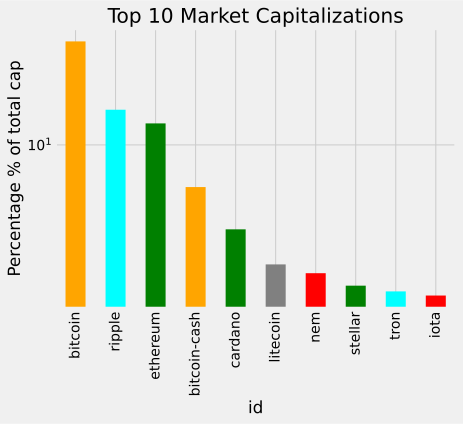

In [ ]:
#select the top 10 coins with highest market cap
TITLE = 'Top 10 Market Capitalizations'
yAxis = 'Percentage % of total cap'
top10 = marketCap[:10].set_index('id')

#calculate the top10 market cap percentage
top10 = top10.assign(capPerc = lambda x: (x.market_cap_usd / marketCap.market_cap_usd.sum())*100)

#display graph
#colors will match the respective cryptos' themes
COLORS = ['orange','cyan','green','orange', 'green','gray', 'red', 'green', 'cyan', 'red' ]
ax = top10.capPerc.plot.bar(title = TITLE, color = COLORS, logy = True)
ax.set_ylabel(yAxis)

#Volatility in cryptocurrencies
We will analyze the percent changes in crypto values by 24 hour and 7 day periods, both of which are already available in the original dataframe

In [ ]:
#create a volatility dataframe
volatility = df[['id','percent_change_24h','percent_change_7d']]

#drop all NaN rows
volatility = volatility.set_index('id').dropna()

#sort the dataframe by percent_change_24h in ascending order
volatility = volatility.sort_values('percent_change_24h')

volatility.head()

,percent_change_24h,percent_change_7d
id,,
ardor,-20.83,2.76
tenx,-15.81,6.55
tron,-12.63,434.36
digixdao,-12.19,15.65
status,-11.95,201.88


#We see positive and negative changes in price
However, there is no clear cut rate of the change so we will resolve to analyze the top 10 gainers and top 10 losers

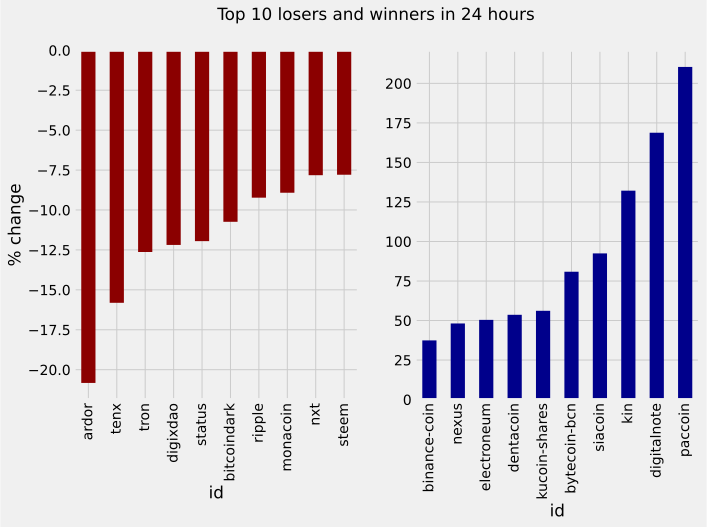

In [ ]:
from matplotlib.bezier import find_bezier_t_intersecting_with_closedpath
#Create a function to create subplots, taking parameters series and title
def top10_subplot(volatility_series,title):
  #make the subplot and figure for two plots
  fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(10,6))

  #Plot a barchart for the top10 losers
  ax = (volatility_series[:10].plot.bar(color = 'darkred', ax = axes[0]))
  fig.suptitle(title)
  ax.set_ylabel('% change')

  #plot for the top10 winners
  ax = (volatility_series[-10:].plot.bar(color = 'darkblue', ax = axes[1]))

  return fig, ax

figTitle = 'Top 10 losers and winners in 24 hours'
fig, ax = top10_subplot(volatility.percent_change_24h, figTitle)


#The names of the cryptocurrencies above are quite unknown,
 and there is a considerable fluctuation between the 1 and 7 days percentage changes. As with stocks, and many other financial products, the smaller the capitalization, the bigger the risk and reward. Smaller cryptocurrencies are less stable projects in general, and therefore even riskier investments than the bigger ones1. Let's classify our dataset based on Investopedia's capitalization definitions for company stocks

In [ ]:
#Select crypto with caps bigger than 10 billion
largeCaps = marketCap.query('market_cap_usd > 1E+10')
largeCaps

,id,market_cap_usd
0,bitcoin,284909052105
1,ripple,119207709132
2,ethereum,100115499075
3,bitcoin-cash,44424061657
4,cardano,25916647856
5,litecoin,16574020942
6,nem,14813369998
7,stellar,12634630726
8,tron,11741640953
9,iota,11143859582


<BarContainer object of 3 artists>

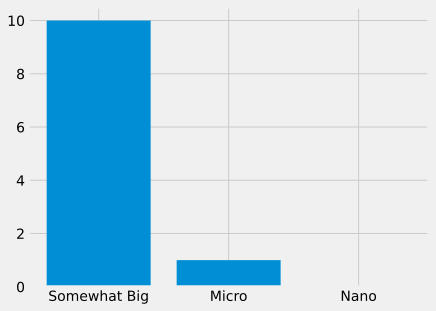

In [ ]:
#make a function for counting different marketcaps from the marketCap dataframe
#returns an int
def capCount(queryString):
  return marketCap.query(queryString).count().id

#labels for the plot
LABELS = ['Somewhat Big','Micro', 'Nano']

#count the somewhat big crypto with capCount
SomewhatBig = capCount('market_cap_usd > 1E+10')

#count the micro crypto
Micro = capCount('market_cap_usd >= 5E+7 & market_cap_usd <= 3E+8')

#Count the nano crypto
Nano = capCount('market_cap_usd < 5E+7')

#List the 3 value counts
values = [SomewhatBig,Micro,Nano]

#plot the values with matplotlib
plt.bar(range(len(values)), values, tick_label = LABELS)